# Project 2 Cleaning and EDA

In [1]:
# import packages 
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Change to DATA directory
os.chdir("/sfs/gpfs/tardis/home/rvt9bx/ds4002/project2/Project-2/DATA")

## Cleaning

In [3]:
# Cleaning PFL 

# import data 
pfl_df = pd.read_csv('PFL_raw_na.csv', low_memory=False)

# remove code column 
pfl_df.drop(columns=['code'], inplace=True)

# remove countries with NA data 
pfl_df = pfl_df.dropna()

In [4]:
# Cleaning IFL 

# import data 
ifl_df = pd.read_csv('IFL_raw_na.csv', low_memory=False)

# remove code column 
ifl_df.drop(columns=['code'], inplace=True)

# remove countries with NA data 
ifl_df = ifl_df.dropna()

In [5]:
# Cleaning URB

# import data 
urb_df = pd.read_csv('URB_raw_na.csv', low_memory=False)

# remove code column 
urb_df.drop(columns=['code'], inplace=True)

# remove countries with NA data 
urb_df = urb_df.dropna()

In [6]:
# merge to see countries that are in both pfl and ifl

merge_df = pfl_df.merge(ifl_df, how='outer', on='iso', indicator=True)
countries = merge_df.loc[merge_df['_merge']=='both']['iso']

In [14]:
# subset pfl, ifl, and urb to just the 50 countries for analysis

clean_pfl = pfl_df.loc[pfl_df['iso'].isin(countries)]
clean_ifl = ifl_df.loc[ifl_df['iso'].isin(countries)]
clean_urb = urb_df.loc[urb_df['iso'].isin(countries)]

In [8]:
# subset urb to just the years we have for pfl/ifl 
clean_urb = clean_urb[['iso', 'country', 'URB.raw.2005', 'URB.raw.2006',
       'URB.raw.2007', 'URB.raw.2008', 'URB.raw.2009', 'URB.raw.2010',
       'URB.raw.2011', 'URB.raw.2012', 'URB.raw.2013', 'URB.raw.2014',
       'URB.raw.2015', 'URB.raw.2016', 'URB.raw.2017', 'URB.raw.2018',
       'URB.raw.2019', 'URB.raw.2020', 'URB.raw.2021', 'URB.raw.2022']]

In [12]:
# export clean data 

clean_pfl.to_csv("clean_PFL.csv", index=False)
clean_ifl.to_csv("clean_IFL.csv", index=False)
clean_urb.to_csv("clean_URB.csv", index=False)

## EDA

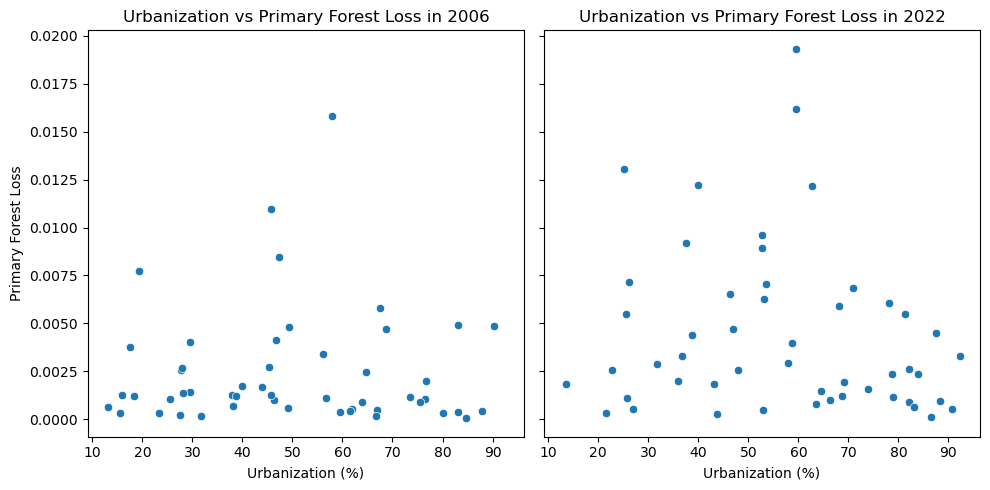

In [11]:
# scatterplot for URB vs PFL, 2006 vs 2022

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# Merge data 
df1 = clean_pfl.merge(clean_urb, how='outer', on='iso')
df2 = clean_ifl.merge(clean_urb, how='outer', on='iso')

# Scatter plot 1
sns.scatterplot(x='URB.raw.2006', y='PFL.raw.2006', data=df1, ax=axes[0])
axes[0].set_title('Urbanization vs Primary Forest Loss in 2006')
axes[0].set_xlabel("Urbanization (%)")
axes[0].set_ylabel("Primary Forest Loss")

# Scatter plot 2
sns.scatterplot(x='URB.raw.2022', y='PFL.raw.2022', data=df1, ax=axes[1])
axes[1].set_title('Urbanization vs Primary Forest Loss in 2022')
axes[1].set_xlabel("Urbanization (%)")

plt.tight_layout()
plt.show()

In [13]:
# export plot 
os.chdir("/sfs/gpfs/tardis/home/rvt9bx/ds4002/project2/Project-2")
fig.savefig("OUTPUT/pfl_scatterplot_comparison.png", dpi=300, bbox_inches='tight')

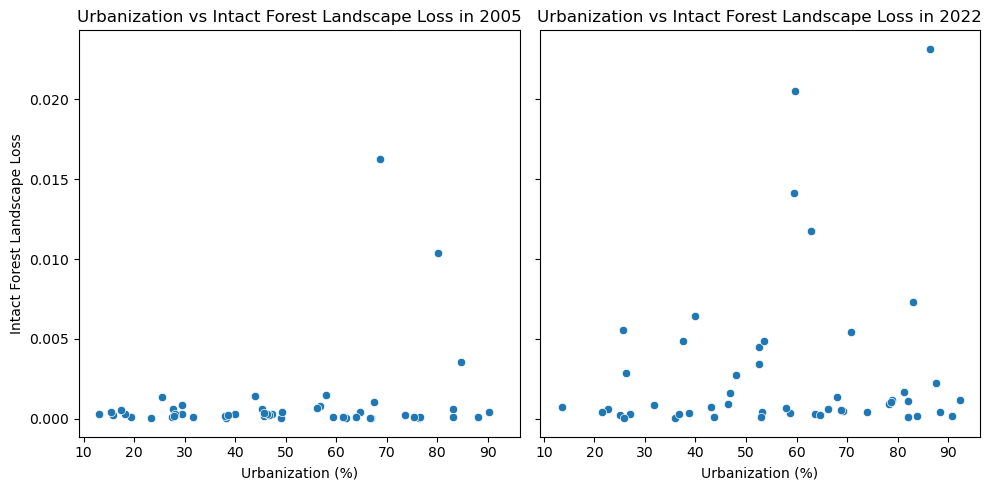

In [16]:
# scatterplot for URB vs IFL, 2005 vs 2022

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# Scatter plot 1
sns.scatterplot(x='URB.raw.2006', y='IFL.raw.2005', data=df2, ax=axes[0])
axes[0].set_title('Urbanization vs Intact Forest Landscape Loss in 2005')
axes[0].set_xlabel("Urbanization (%)")
axes[0].set_ylabel("Intact Forest Landscape Loss")

# Scatter plot 2
sns.scatterplot(x='URB.raw.2022', y='IFL.raw.2022', data=df2, ax=axes[1])
axes[1].set_title('Urbanization vs Intact Forest Landscape Loss in 2022')
axes[1].set_xlabel("Urbanization (%)")

plt.tight_layout()
plt.show()

In [17]:
# export plot 
os.chdir("/sfs/gpfs/tardis/home/rvt9bx/ds4002/project2/Project-2")
fig.savefig("OUTPUT/ifl_scatterplot_comparison.png", dpi=300, bbox_inches='tight')

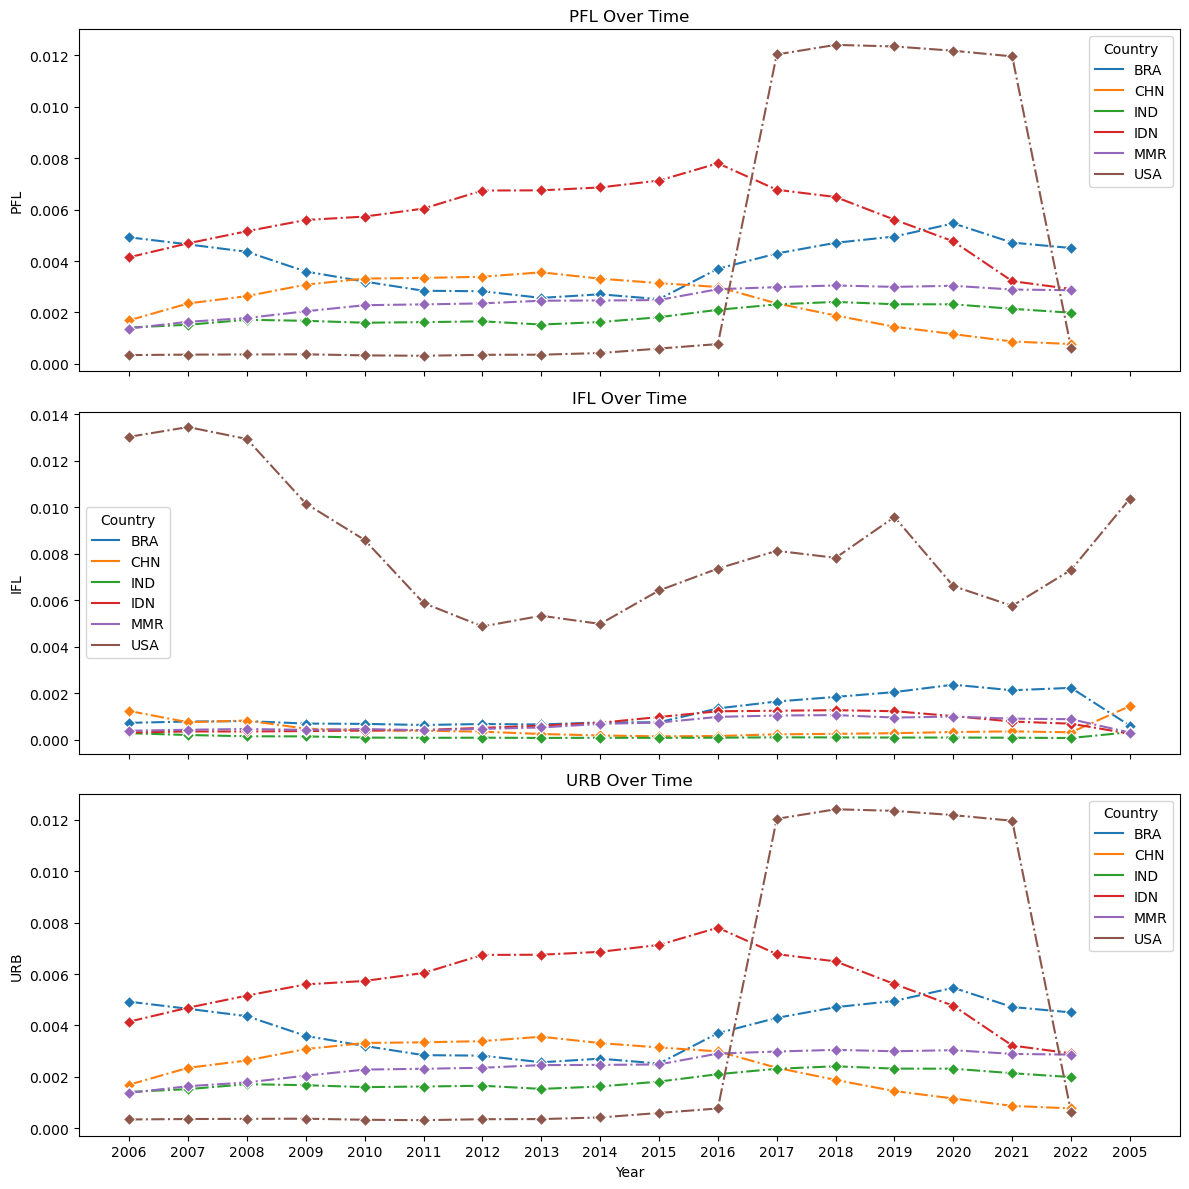

In [46]:
# all three over time

# restructure data
pfl_melted = clean_pfl.drop(columns=['country']).melt(id_vars='iso', var_name='Year', value_name='PFL')
pfl_melted['Year'] = pfl_melted['Year'].str.strip('PFLIURB.raw.')
ifl_melted = clean_ifl.drop(columns=['country']).melt(id_vars='iso', var_name='Year', value_name='IFL')
ifl_melted['Year'] = ifl_melted['Year'].str.strip('PFLIURB.raw.')
urb_melted = clean_pfl.drop(columns=['country']).melt(id_vars='iso', var_name='Year', value_name='URB')
urb_melted['Year'] = urb_melted['Year'].str.strip('PFLIURB.raw.')
df = pfl_melted.merge(ifl_melted, how='outer', on=['iso','Year']).merge(urb_melted, how='outer', on=['iso','Year'])
# select just Brazil, US, Indonesia, Myanmar, India, China (chosen bc of https://www.globalforestwatch.org/dashboards/global/?category=forest-change)
df = df.loc[df.iso.isin(['BRA','USA','IDN','MMR','IND','CHN'])]

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)  # 3 rows, 1 column

# Plot PFL
sns.lineplot(x='Year', y='PFL', hue='iso', data=df, marker='D', linestyle='-.', ax=axes[0])
axes[0].set_title('PFL Over Time')
axes[0].set_ylabel('PFL')
legend = axes[0].get_legend()
legend.set_title("Country")

# Plot IFL
sns.lineplot(x='Year', y='IFL', hue='iso', data=df, marker='D', linestyle='-.', ax=axes[1])
axes[1].set_title('IFL Over Time')
axes[1].set_ylabel('IFL')
legend = axes[1].get_legend()
legend.set_title("Country")

# Plot URB
sns.lineplot(x='Year', y='URB', hue='iso', data=df, marker='D', linestyle='-.', ax=axes[2])
axes[2].set_title('URB Over Time')
axes[2].set_ylabel('URB')
legend = axes[2].get_legend()
legend.set_title("Country")

# Improve layout
plt.xlabel('Year')  # Add x-axis label to the bottom plot only
plt.tight_layout()
plt.show()

In [47]:
# export plot 
os.chdir("/sfs/gpfs/tardis/home/rvt9bx/ds4002/project2/Project-2")
fig.savefig("OUTPUT/pfl_ifl_urb_line_graph.png", dpi=300, bbox_inches='tight')